# Effects of Loans Features on The Borrower Interest

## Investigation Overview

In this investigation, I wanted to look at the features of loans that could be used to know which contributes to a lower Borrowe interest rate.

## Dataset Overview

The data consisted of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate , current loan status, borrower income, and other features.

In [48]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [49]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [50]:
# remove the unnecessary features from the dataset 

features = ['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', \
            'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', \
            'ProsperScore', 'EmploymentStatus', 'EmploymentStatusDuration',\
            'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'Investors',]

loans = loans[features]

In [51]:
# convert into ordered categorical types
loans['CreditGrade'].fillna('NC', inplace =True) 
loans['ProsperRating (Alpha)'].fillna('N/A', inplace =True) 

ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperRating (Alpha)': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'IncomeRange': ['Not displayed','Not employed', '$0', '$1-24,999', '$25,000-49,999', 
                                               '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                   'EmploymentStatus': ['Not available', 'Other', 'Not employed', 'Self-employed', 
                                               'Part-time', 'Full-time', 'Employed', 'Retired']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

## Distribution of Borrower Interest
The Borrower rate distribution looks normally distributed, but there is a spike at around 0.3 interest.  

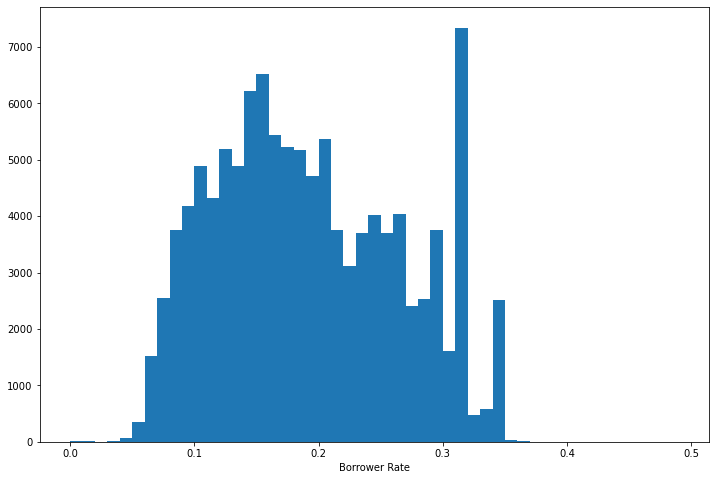

In [52]:
#Bowrrow Rate distribution

binsize = 0.01
rate_bins = np.arange(loans.BorrowerRate.min(), loans.BorrowerRate.max(), binsize)
plt.figure(figsize=[12, 8])
plt.hist(data=loans, x='BorrowerRate', bins=rate_bins)
plt.xlabel('Borrower Rate')
plt.show()

## Distribution of Debt To Income Ratio

There's a long tail in the DebtToIncomeRatio distribution

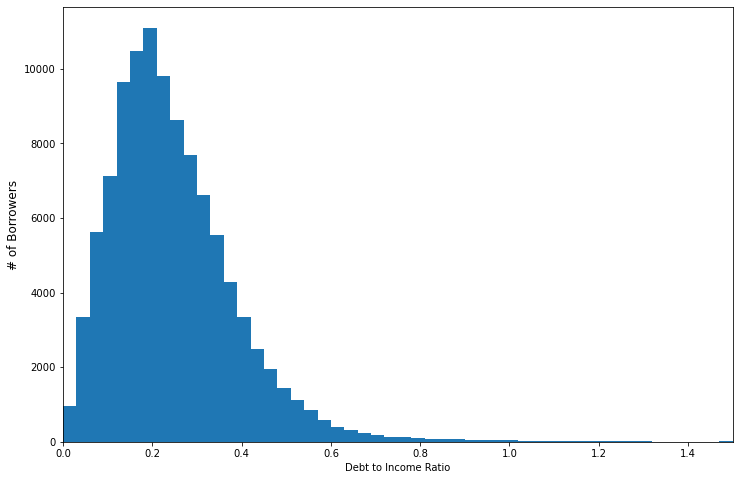

In [53]:
# DebtToIncomeRatio distribution

binsize = 0.03
ratio_bins = np.arange(loans.DebtToIncomeRatio.min(), loans.DebtToIncomeRatio.max()+ binsize, binsize)
plt.figure(figsize=[12, 8])
plt.hist(data=loans, x='DebtToIncomeRatio', bins=ratio_bins);
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers', size = 12)
plt.xlim(0,1.5)
plt.show()


## Distribution of The Stated Monthy Income

The distribution of the stated monthly income on the log scale is normally distributed. 

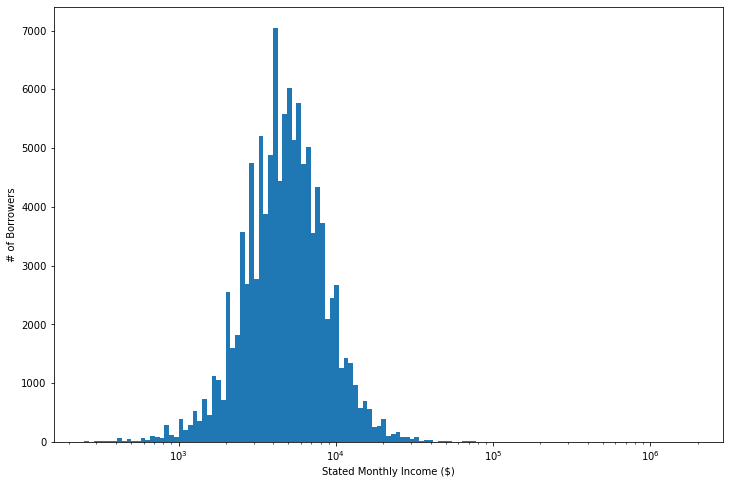

In [54]:
# the stated monthy income on the log scale 
log_binsize = 0.03
ratio_bins = 10 ** np.arange(2.4, np.log10(loans.StatedMonthlyIncome.max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = loans, x='StatedMonthlyIncome', bins=ratio_bins)
plt.xscale('log')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('# of Borrowers')
plt.show()

## Distribution of The Borrower's Employment Status


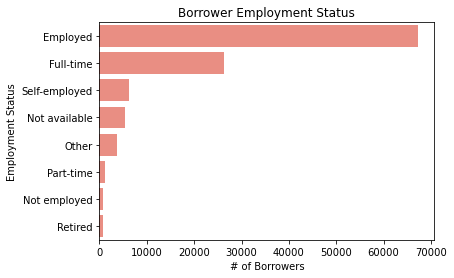

In [55]:
sb.countplot(data = loans, y = 'EmploymentStatus', color = 'salmon', order = loans['EmploymentStatus'].value_counts().index)
plt.title('Borrower Employment Status')
plt.xlabel('# of Borrowers')
plt.ylabel('Employment Status')
plt.show()

## Distribution of The Borrower's Risk Score (ProsperScore)

ProsperScore distribution looks normally distributed, with sligh increase in the 4 and 8 scores. 

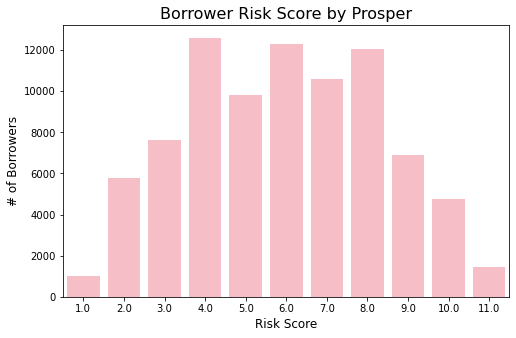

In [56]:
binsize = 1
bins = np.arange(loans['ProsperScore'].min(), loans['ProsperScore'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
sb.countplot(data = loans, x = 'ProsperScore', color = 'lightpink')
plt.title('Borrower Risk Score by Prosper', size = 16)
plt.xlabel('Risk Score', size = 12)
plt.ylabel('# of Borrowers', size = 12)
plt.show()

## Invistigating bi-relationships

In [57]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate','Term', 'EmploymentStatusDuration','ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Investors']
categoric_vars = ['CreditGrade', 'ProsperRating (Alpha)','LoanStatus', 'EmploymentStatus','IncomeRange', 'IsBorrowerHomeowner']
                  

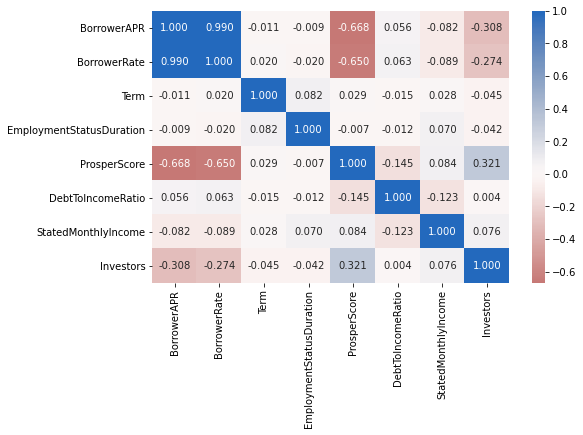

In [58]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Borrower Rate vs Borrower APR
There is a strong correlation between the Borrower APR and the Borrower Rate which is expected.

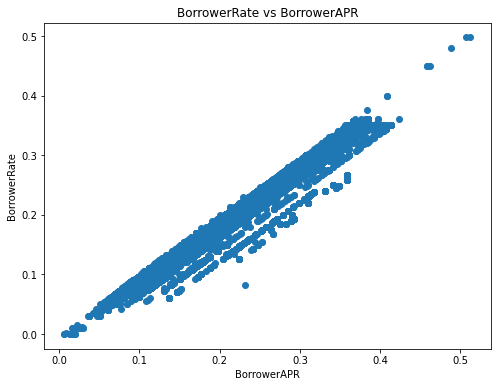

In [59]:
plt.figure(figsize = [8, 6])
plt.scatter(data = loans, x = 'BorrowerAPR', y = 'BorrowerRate')
plt.title('BorrowerRate vs BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')

plt.show()

## Borrower Rate vs # of Investors

There a slight anti-correlation between the number of investors and the the Borrower rate.

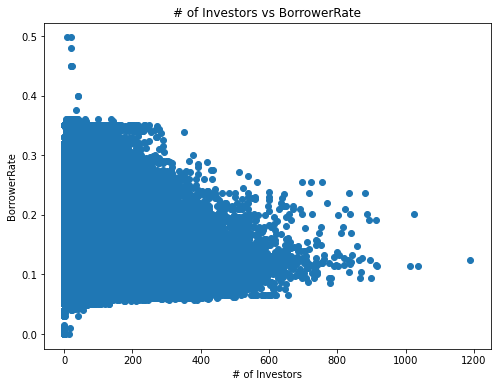

In [60]:
plt.figure(figsize = [8, 6])
plt.scatter(data = loans, x = 'Investors', y = 'BorrowerRate')
plt.title('# of Investors vs BorrowerRate')
plt.xlabel('# of Investors')
plt.ylabel('BorrowerRate')

plt.show()

## Borrower Rate by Term Duration and Prosper Score 

Shorter term durations in combination with higher Prosper Score results in decreated Borrower Rate. 

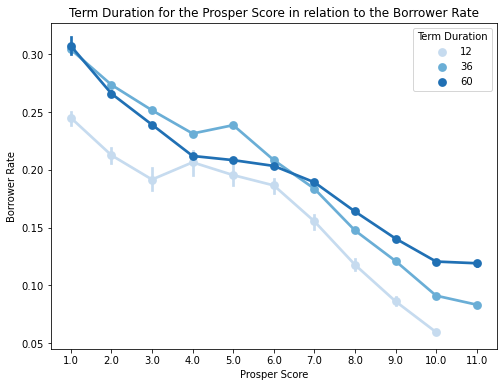

In [61]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='ProsperScore', y='BorrowerRate', hue='Term',
           palette = 'Blues', linestyles = '-')
plt.title('Term Duration for the Prosper Score in relation to the Borrower Rate')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate')
plt.legend(loc=1, title = 'Term Duration')
plt.show();

## Borrower Rate by Employment Status and Home Ownership

A Borrower with full-time employment and home ownership has lowest borrrower rate, opposite to an non-employed person with no home ownership, wich is expected. 

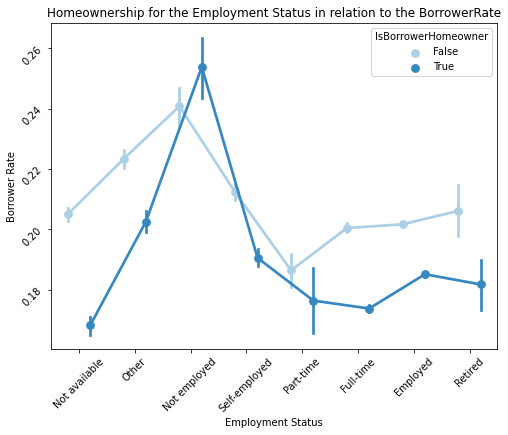

In [62]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='EmploymentStatus', y='BorrowerRate', hue='IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '-', dodge = 0.4)
plt.title('Homeownership for the Employment Status in relation to the BorrowerRate')
plt.xlabel('Employment Status')
ax.tick_params(labelrotation=45)
plt.ylabel('Borrower Rate')

plt.show();

## Borrower Rate by Prosper Score and Employment Status

employment status doesn't make much difference if it's accompanied with high prosper score. However, the lower the prosper score gets,  emplyment status is then taken into consideration for deciding on the borrower rate. 

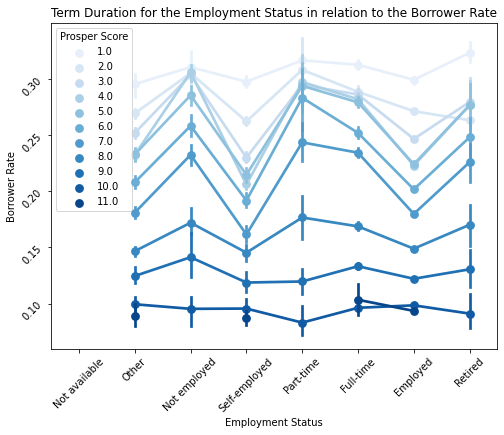

In [63]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='EmploymentStatus', y='BorrowerRate', hue='ProsperScore',
           palette = 'Blues', linestyles = '-')
plt.title('Term Duration for the Employment Status in relation to the Borrower Rate')
plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
ax.tick_params(labelrotation=45)
plt.legend(loc=2, title = 'Prosper Score')
plt.show();

## Borrower Rate by Term Duration and Income Range

Higher income range with shorter term durations has lower borrower rates. 

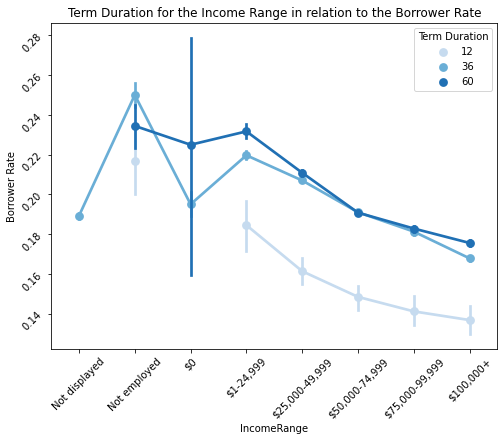

In [64]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x='IncomeRange', y='BorrowerRate', hue='Term',
           palette = 'Blues', linestyles = '-')
plt.title('Term Duration for the Income Range in relation to the Borrower Rate')
plt.xlabel('IncomeRange')
plt.ylabel('Borrower Rate')
ax.tick_params(labelrotation=45)
plt.legend(loc=1, title = 'Term Duration')
plt.show();

**So what combination of factors that result in lower Borrower Rate?**
* Higher income range 
* Higher prosper Score
* Home Ownership 
* Shorter term durations 
* Full time Employment 

In [67]:
jupyter nbconvert Presentation_slides.ipynb --to slides --post serve --template output_toggle

SyntaxError: invalid syntax (<ipython-input-67-8f6584781f9b>, line 1)